### What is COVID-19?

COVID-19 is a respiratory illness caused by a new virus. Symptoms include fever, coughing, sore throat and shortness of breath. The virus can spread from person to person, but good hygiene can prevent infection.

### Related Information about COVID-19

COVID-19 may not be fatal but it spreads faster than other diseases, like common cold. Every virus has Basic Reproduction number (R0) which implies how many people will get the disease from the infected person. As per inital reseach work R0 of COVID-19 is 2.7.

Currently the goal of all scientists around the world is to "Flatten the Curve". COVID-19 currently has exponential growth rate around the world which we will be seeing in the notebook ahead. Flattening the Curve typically implies even if the number of Confirmed Cases are increasing but the distribution of those cases should be over longer timestamp. To put it in simple words if say suppose COVID-19 is going infect 100K people then those many people should be infected in 1 year but not in a month. 

The sole reason to Flatten the Curve is to reudce the load on the Medical Systems so as to increase the focus of Research to find the Medicine for the disease.

Every Pandemic has four stages:

Stage 1: Confirmed Cases come from other countries

Stage 2: Local Transmission Begins

Stage 3: Communities impacted with local transimission

Stage 4: Significant Transmission with no end in sight

Italy and Korea are the two countries which are currently in Stage 4
While India is in Stage 2.

Other ways to tackle the disease like Corona other than Travel Ban, Cross-Border shutdown, Ban on immigrants are Testing, Contact Tracing and Quarantine.

### Objective of the Notebook

Objective of this notebook is to study COVID-19 outbreak with the help of some basic visualizations techniques. Comparison of China where the COVID-19 originally originated from with the Rest of the World. Perform predictions and Time Series forecasting in order to study the impact and spread of the COVID-19 in comming days. 

## Let's get Started

## Importing required Python Packages and Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from fbprophet import Prophet
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA

In [2]:
covid=pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
print("Size/Shape of the dataset: ",covid.shape)
print("Checking for null values:\n",covid.isnull().sum())
print("Checking Data-type of each column:\n",covid.dtypes)

Size/Shape of the dataset:  (6722, 8)
Checking for null values:
 SNo                   0
ObservationDate       0
Province/State     2766
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
Checking Data-type of each column:
 SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [4]:
#Dropping column as SNo is of no use, and "Province/State" contains too many missing values
covid.drop(["SNo"],1,inplace=True)

In [5]:
#Converting "Observation Date" into Datetime format
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

## Datewise analysis 

In [6]:
#Grouping different types of cases as per the date
datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise.head()

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,555.0,28.0,17.0
2020-01-23,653.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1438.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0


In [7]:
print("Basic Information")
print("Totol number of countries with Disease Spread: ",len(covid["Country/Region"].unique()))
print("Total number of Confirmed Cases",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered Cases",datewise["Recovered"].iloc[-1])
print("Total number of Deaths Cases",datewise["Deaths"].iloc[-1])

Basic Information
Totol number of countries with Disease Spread:  179
Total number of Confirmed Cases 214915.0
Total number of Recovered Cases 83313.0
Total number of Deaths Cases 8733.0


Text(0.5, 1.0, 'Density Distribution Plot for Confirmed Cases')

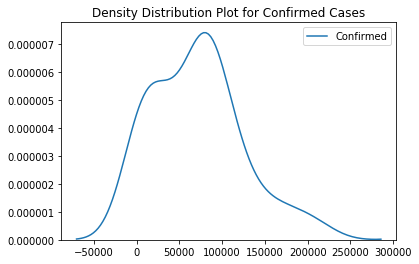

In [8]:
#Distribution plot of confirmed cases around the world 
sns.kdeplot(datewise["Confirmed"])
plt.title("Density Distribution Plot for Confirmed Cases")

Text(0.5, 1.0, 'Density Distribution Plot for Death Cases')

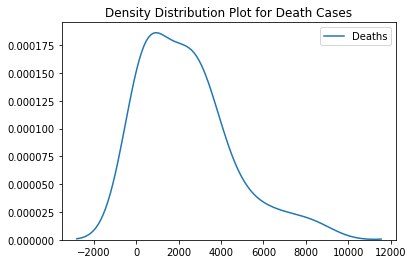

In [9]:
sns.kdeplot(datewise["Deaths"])
plt.title("Density Distribution Plot for Death Cases")

Text(0.5, 1.0, 'Density Distribution Plot for Recovered Cases')

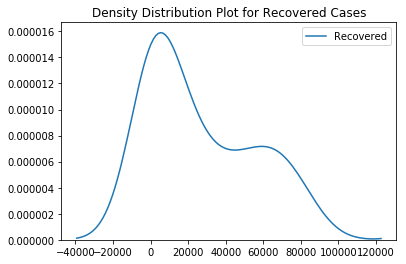

In [10]:
sns.kdeplot(datewise["Recovered"])
plt.title("Density Distribution Plot for Recovered Cases")

#### Growth rate of Confirmed, Recovered and Death Cases 

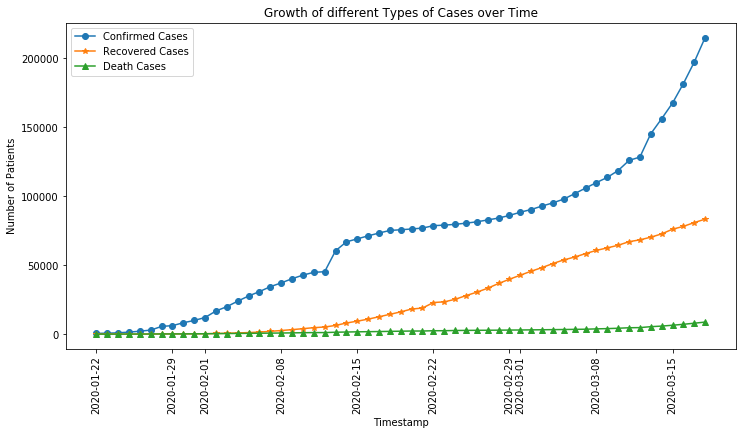

In [11]:
plt.figure(figsize=(12,6))
plt.plot(datewise["Confirmed"],marker="o",label="Confirmed Cases")
plt.plot(datewise["Recovered"],marker="*",label="Recovered Cases")
plt.plot(datewise["Deaths"],marker="^",label="Death Cases")
plt.ylabel("Number of Patients")
plt.xlabel("Timestamp")
plt.xticks(rotation=90)
plt.title("Growth of different Types of Cases over Time")
plt.legend()

#### Moratality and Recovery Rate analysis around the World

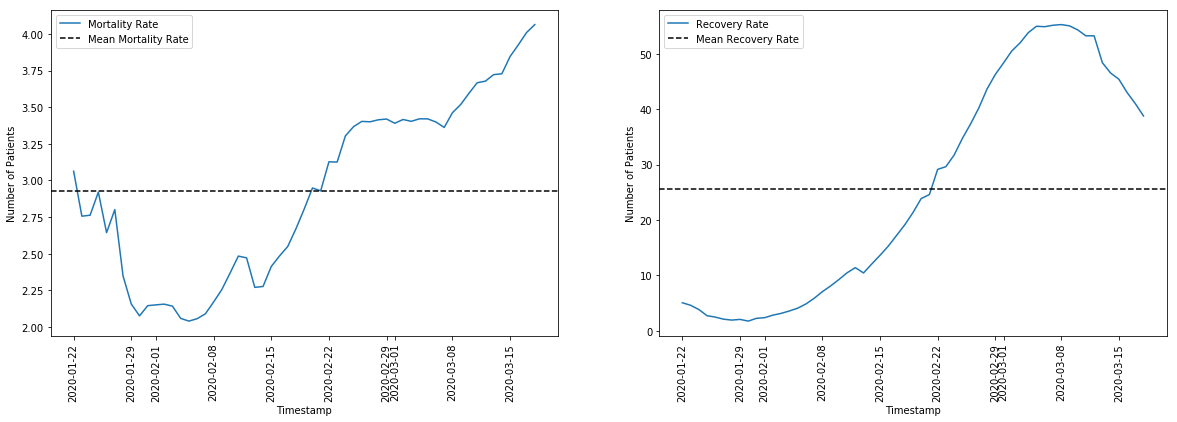

In [12]:
#Calculating the Mortality Rate and Recovery Rate
datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100

#Plotting Mortality and Recovery Rate 
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))
ax1.plot(datewise["Mortality Rate"],label='Mortality Rate')
ax1.axhline(datewise["Mortality Rate"].mean(),linestyle='--',color='black',label="Mean Mortality Rate")
ax1.set_ylabel("Number of Patients")
ax1.set_xlabel("Timestamp")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise["Recovery Rate"],label="Recovery Rate")
ax2.axhline(datewise["Recovery Rate"].mean(),linestyle='--',color='black',label="Mean Recovery Rate")
ax2.set_ylabel("Number of Patients")
ax2.set_xlabel("Timestamp")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

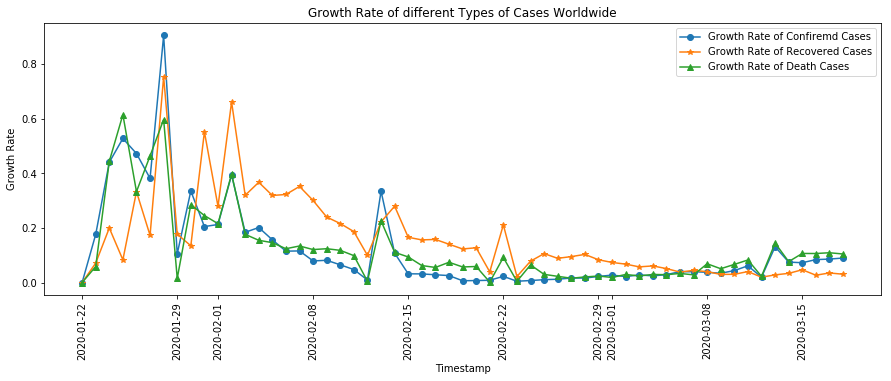

In [13]:
percent_increase_confirm=[]
percent_increase_recovered=[]
percent_increase_deaths=[]
for i in range(datewise.shape[0]-1):
    percent_increase_confirm.append(((datewise["Confirmed"].iloc[i+1]-datewise["Confirmed"].iloc[i])/datewise["Confirmed"].iloc[i]))
    percent_increase_recovered.append(((datewise["Recovered"].iloc[i+1]-datewise["Recovered"].iloc[i])/datewise["Recovered"].iloc[i]))
    percent_increase_deaths.append(((datewise["Deaths"].iloc[i+1]-datewise["Deaths"].iloc[i])/datewise["Deaths"].iloc[i]))
percent_increase_confirm.insert(0,0)
percent_increase_recovered.insert(0,0)
percent_increase_deaths.insert(0,0)

plt.figure(figsize=(15,5))
plt.plot(datewise.index,percent_increase_confirm,label="Growth Rate of Confiremd Cases",marker='o')
plt.plot(datewise.index,percent_increase_recovered,label="Growth Rate of Recovered Cases",marker='*')
plt.plot(datewise.index,percent_increase_deaths,label="Growth Rate of Death Cases",marker='^')
plt.xlabel("Timestamp")
plt.ylabel("Growth Rate")
plt.title("Growth Rate of different Types of Cases Worldwide")
plt.xticks(rotation=90)
plt.legend()

## Countrywise Analysis

In [14]:
#Calculating countrywise Moratality and Recovery Rate
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

#### Top 25 Countries as per Mortatlity Rate with more than 50 Confirmed Cases and Recovery Rate with more than 100 Confirmed Cases

Text(0.5, 0, 'Recovery (in Percentage)')

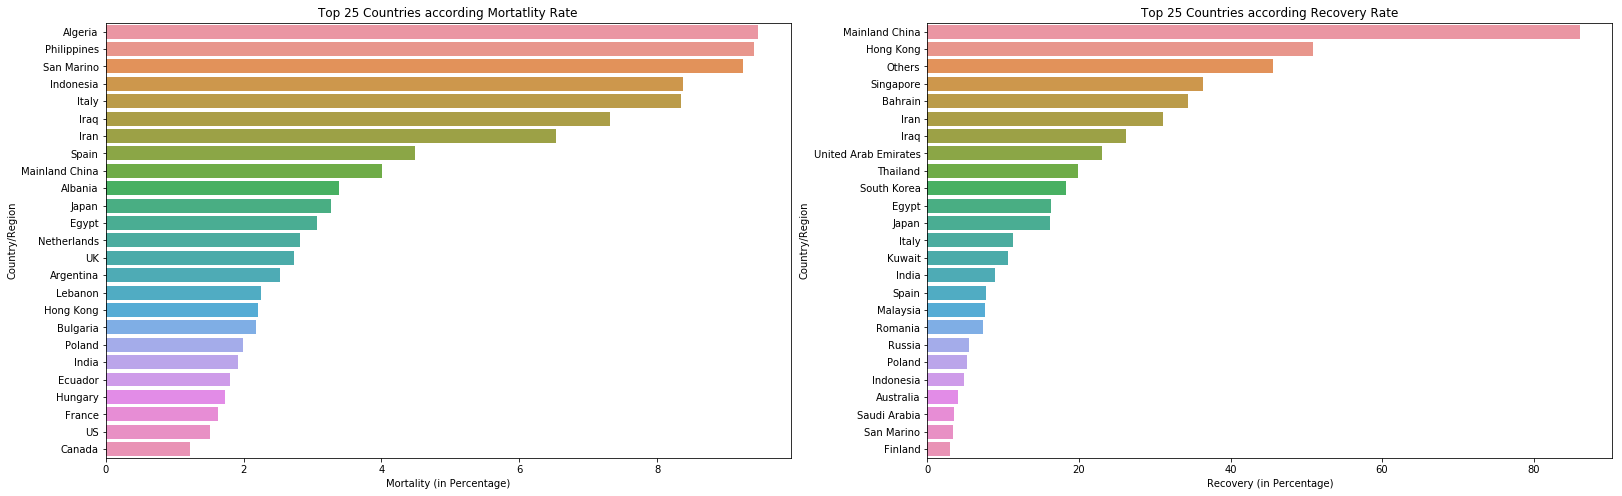

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(27,8))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>50].sort_values(["Mortality"],ascending=False).head(25)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 25 Countries according Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>100].sort_values(["Recovery"],ascending=False).head(25)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 25 Countries according Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

#### Countries with more than 30 Confirmed and Cases with No Recovered Patients with considerable Mortality Rate

In [16]:
no_recovered_countries=countrywise[(countrywise["Confirmed"]>30)&(countrywise["Recovered"]==0)][["Confirmed","Deaths"]]
no_recovered_countries["Mortality Rate"]=(no_recovered_countries["Deaths"]/no_recovered_countries["Confirmed"])*100
no_recovered_countries[no_recovered_countries["Mortality Rate"]>0].sort_values(["Confirmed"],ascending=False)

,Confirmed,Deaths,Mortality Rate
Country/Region,,,
Slovenia,275.0,1.0,0.363636
Luxembourg,203.0,2.0,0.985222
Ecuador,111.0,2.0,1.801802
Slovakia,105.0,1.0,0.952381
Turkey,98.0,1.0,1.020408
Bulgaria,92.0,2.0,2.173913
Panama,86.0,1.0,1.162791
Albania,59.0,2.0,3.389831


#### Countries with more than 100 Confirmed Cases and No Deaths with considerably high Recovery Rate

In [17]:
no_deaths=countrywise[(countrywise["Confirmed"]>100)&(countrywise["Deaths"]==0)]
no_deaths[no_deaths["Recovery"]>0].sort_values(["Recovery"],ascending=False)

,Confirmed,Recovered,Deaths,Mortality,Recovery
Country/Region,,,,,
Singapore,313.0,114.0,0.0,0.0,36.421725
United Arab Emirates,113.0,26.0,0.0,0.0,23.008850
Kuwait,142.0,15.0,0.0,0.0,10.563380
Romania,260.0,19.0,0.0,0.0,7.307692
Russia,147.0,8.0,0.0,0.0,5.442177
Saudi Arabia,171.0,6.0,0.0,0.0,3.508772
Finland,336.0,10.0,0.0,0.0,2.976190
Israel,433.0,11.0,0.0,0.0,2.540416
Qatar,452.0,4.0,0.0,0.0,0.884956


### Comparison of China, Italy and Rest of the World

In [18]:
china_data=covid[covid["Country/Region"]=="Mainland China"]
Italy_data=covid[covid["Country/Region"]=="Italy"]
rest_of_world=covid[(covid["Country/Region"]!="Mainland China")&(covid["Country/Region"]!="Italy")]

datewise_china=china_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Italy=Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_restofworld=rest_of_world.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

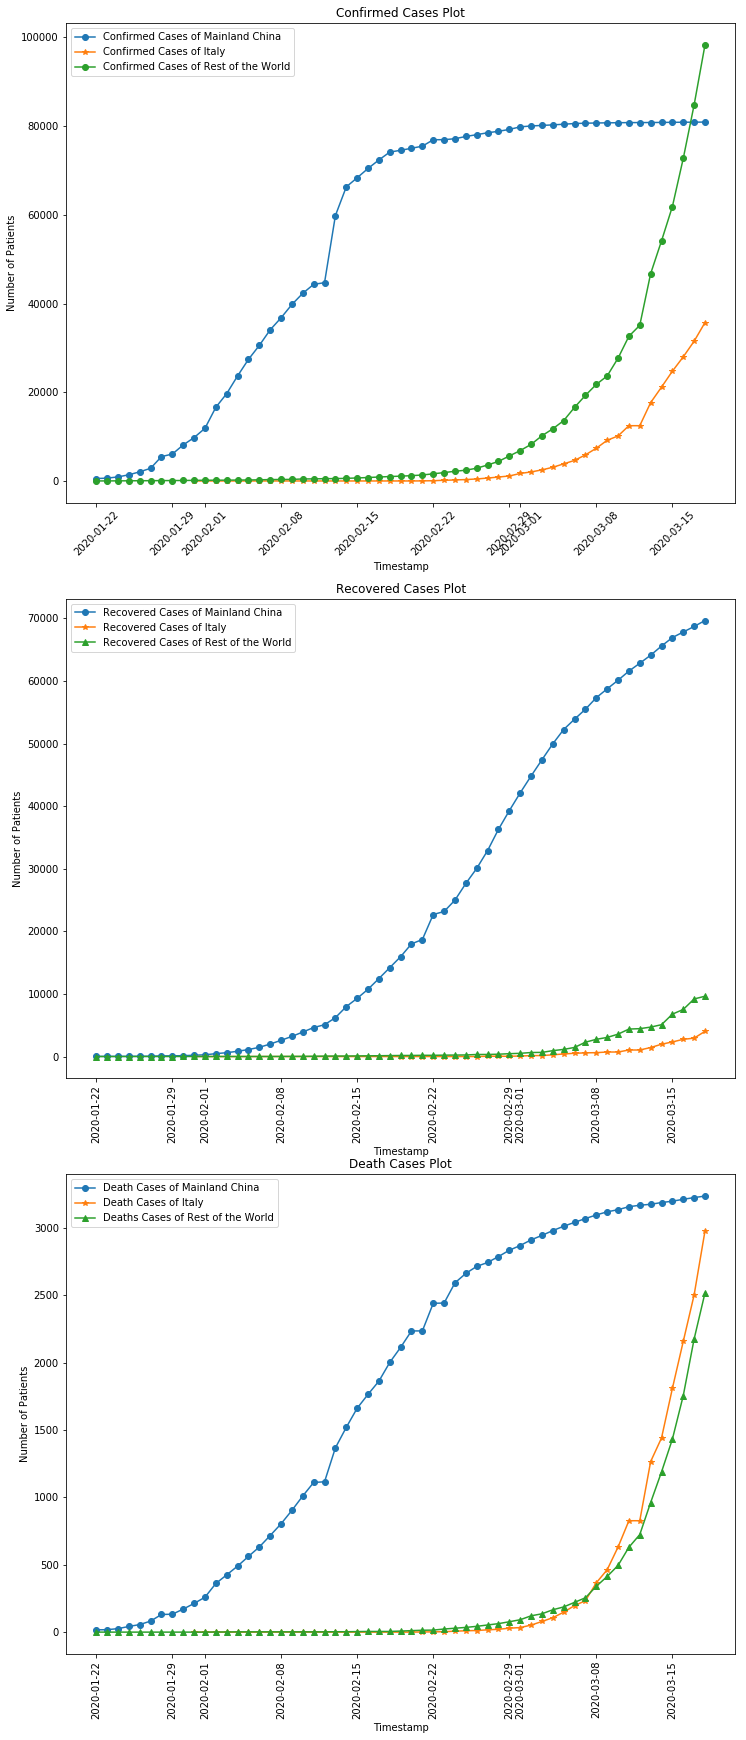

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(12,30))
ax1.plot(datewise_china["Confirmed"],label="Confirmed Cases of Mainland China",marker='o')
ax1.plot(datewise_Italy["Confirmed"],label="Confirmed Cases of Italy",marker='*')
ax1.plot(datewise_restofworld["Confirmed"],label="Confirmed Cases of Rest of the World",marker='o')
ax1.set_title("Confirmed Cases Plot")
ax1.set_ylabel("Number of Patients")
ax1.set_xlabel("Timestamp")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax2.plot(datewise_china["Recovered"],label="Recovered Cases of Mainland China",marker='o')
ax2.plot(datewise_Italy["Recovered"],label="Recovered Cases of Italy",marker='*')
ax2.plot(datewise_restofworld["Recovered"],label="Recovered Cases of Rest of the World",marker='^')
ax2.set_title("Recovered Cases Plot")
ax2.set_ylabel("Number of Patients")
ax2.set_xlabel("Timestamp")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
ax3.plot(datewise_china["Deaths"],label='Death Cases of Mainland China',marker='o')
ax3.plot(datewise_Italy["Deaths"],label='Death Cases of Italy',marker='*')
ax3.plot(datewise_restofworld["Deaths"],label="Deaths Cases of Rest of the World",marker='^')
ax3.set_title("Death Cases Plot")
ax3.set_ylabel("Number of Patients")
ax3.set_xlabel("Timestamp")
ax3.legend()
for tick in ax3.get_xticklabels():
    tick.set_rotation(90)

In [20]:
datewise_china["Mortality"]=(datewise_china["Deaths"]/datewise_china["Confirmed"])*100
datewise_Italy["Mortality"]=(datewise_Italy["Deaths"]/datewise_Italy["Confirmed"])*100
datewise_restofworld["Mortality"]=(datewise_restofworld["Deaths"]/datewise_restofworld["Confirmed"])*100
datewise_china["Recovery"]=(datewise_china["Recovered"]/datewise_china["Confirmed"])*100
datewise_Italy["Recovery"]=(datewise_Italy["Recovered"]/datewise_Italy["Confirmed"])*100
datewise_restofworld["Recovery"]=(datewise_restofworld["Recovered"]/datewise_restofworld["Confirmed"])*100

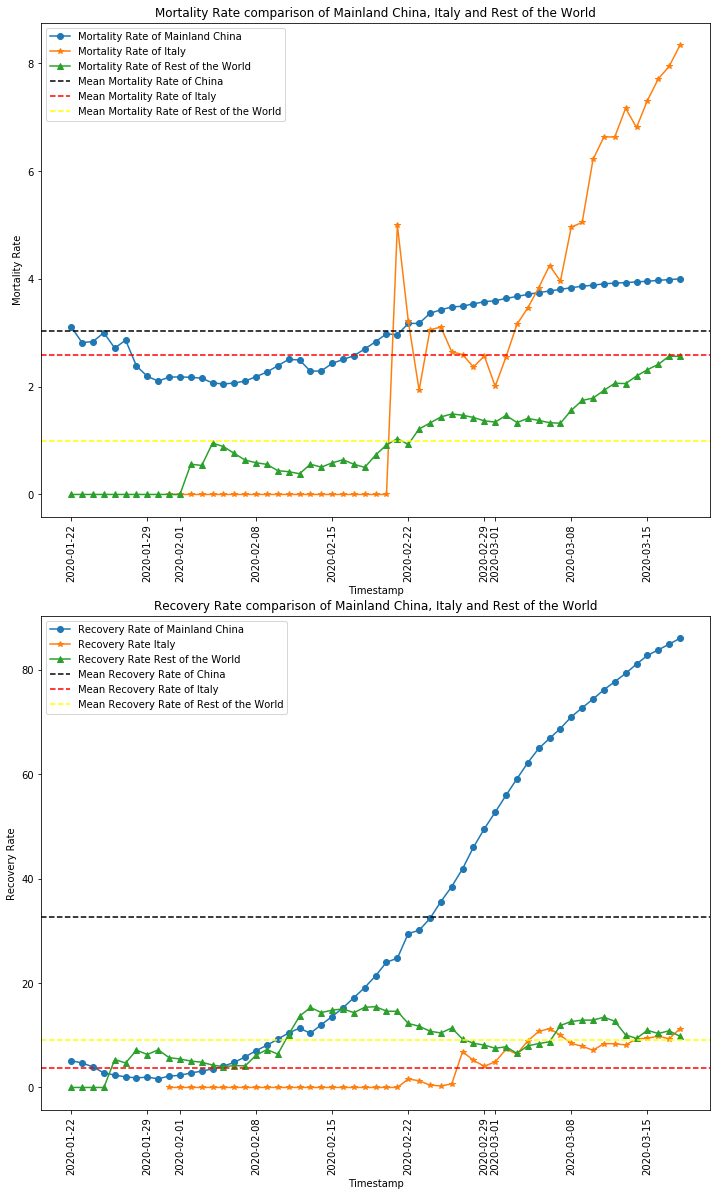

In [21]:
fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(12,20))
ax1.plot(datewise_china["Mortality"],label="Mortality Rate of Mainland China",marker='o')
ax1.plot(datewise_Italy["Mortality"],label="Mortality Rate of Italy",marker='*')
ax1.plot(datewise_restofworld["Mortality"],label="Mortality Rate of Rest of the World",marker='^')
ax1.axhline(datewise_china["Mortality"].mean(),linestyle='--',color='black',label="Mean Mortality Rate of China")
ax1.axhline(datewise_Italy["Mortality"].mean(),linestyle='--',color='red',label="Mean Mortality Rate of Italy")
ax1.axhline(datewise_restofworld["Mortality"].mean(),linestyle='--',color='yellow',label="Mean Mortality Rate of Rest of the World")
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Timestamp")
ax1.set_title("Mortality Rate comparison of Mainland China, Italy and Rest of the World")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise_china["Recovery"],label="Recovery Rate of Mainland China",marker='o')
ax2.plot(datewise_Italy["Recovery"],label="Recovery Rate Italy",marker='*')
ax2.plot(datewise_restofworld["Recovery"],label="Recovery Rate Rest of the World",marker='^')
ax2.axhline(datewise_china["Recovery"].mean(),linestyle='--',color='black',label="Mean Recovery Rate of China")
ax2.axhline(datewise_Italy["Recovery"].mean(),linestyle='--',color='red',label="Mean Recovery Rate of Italy")
ax2.axhline(datewise_restofworld["Recovery"].mean(),linestyle='--',color='yellow',label="Mean Recovery Rate of Rest of the World")
ax2.set_ylabel("Recovery Rate")
ax2.set_xlabel("Timestamp")
ax2.set_title("Recovery Rate comparison of Mainland China, Italy and Rest of the World")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

### Insights from Exploratory Data Analysis

1. Distribution plot of Cofirmed and Death Cases shows a peak. The ultimate goal is to "Flatten those Curves" as discussed earlier. The thing note here is the Recovered Cases Distribution plot is flattening up with time, which is alarming.

2. Growth Rate of Confirmed Cases is exponential.

3. Mainlad China (COVID-19 orginated country) has been able to flatten the growth rate of the confirmed cases with significantly healthy increase in the Recovery Rate. Even after having highest number of Confirmed Cases Mainland China has controlled their Mortality Rate considerably well. China seems to be really following the practices like Testing, Contact Tracing and Quarntine rigorously. 

4. Italy is facing some serious issue controlling the COVID-19. Italy has Lower Recovery Rate compared to even Rest of the World with Death Rate (Mortality Rate) higher than Rest of the World with the highest mortality rate of around 7% among the countries having considerably high number of Confirmed Cases. 

## Data Analysis for India 

In [22]:
india_data=covid[covid["Country/Region"]=="India"]
datewise_india=india_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
print(datewise_india.iloc[-1])

Confirmed    156.0
Recovered     14.0
Deaths         3.0
Name: 2020-03-18 00:00:00, dtype: float64


(array([737453., 737456., 737463., 737470., 737477., 737484., 737485.,
        737492., 737499.]),
 <a list of 9 Text xticklabel objects>)

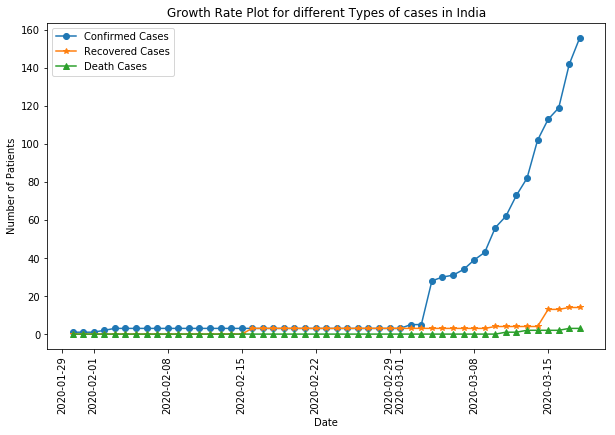

In [23]:
plt.figure(figsize=(10,6))
plt.plot(datewise_india["Confirmed"],marker='o',label="Confirmed Cases")
plt.plot(datewise_india["Recovered"],marker='*',label="Recovered Cases")
plt.plot(datewise_india["Deaths"],marker='^',label="Death Cases")
plt.ylabel("Number of Patients")
plt.xlabel("Date")
plt.legend()
plt.title("Growth Rate Plot for different Types of cases in India")
plt.xticks(rotation=90)

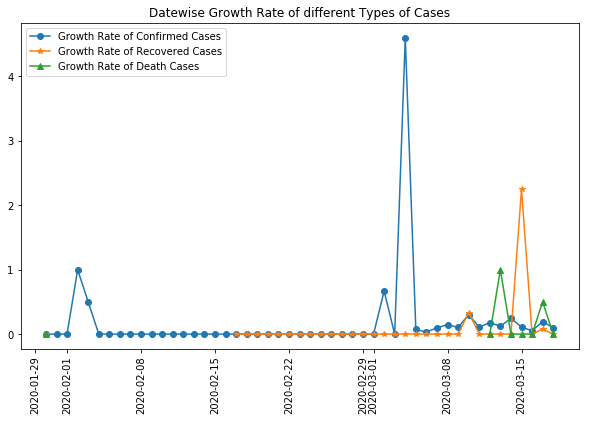

In [24]:
india_increase_confirm=[]
india_increase_recover=[]
india_increase_deaths=[]
for i in range(datewise_india.shape[0]-1):
    india_increase_confirm.append(((datewise_india["Confirmed"].iloc[i+1]-datewise_india["Confirmed"].iloc[i])/datewise_india["Confirmed"].iloc[i]))
    india_increase_recover.append(((datewise_india["Recovered"].iloc[i+1]-datewise_india["Recovered"].iloc[i])/datewise_india["Recovered"].iloc[i]))
    india_increase_deaths.append(((datewise_india["Deaths"].iloc[i+1]-datewise_india["Deaths"].iloc[i])/datewise_india["Deaths"].iloc[i]))
india_increase_confirm.insert(0,0)
india_increase_recover.insert(0,0)
india_increase_deaths.insert(0,0)

plt.figure(figsize=(10,6))
plt.plot(datewise_india.index,india_increase_confirm,label="Growth Rate of Confirmed Cases",marker='o')
plt.plot(datewise_india.index,india_increase_recover,label="Growth Rate of Recovered Cases",marker='*')
plt.plot(datewise_india.index,india_increase_deaths,label="Growth Rate of Death Cases",marker='^')
plt.xticks(rotation=90)
plt.title("Datewise Growth Rate of different Types of Cases")
plt.legend()

## Prediction using Machine Learning Models

#### Linear Regression Model for Confirm Cases Prediction

In [25]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [26]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.80)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.80):]

In [27]:
lin_reg=LinearRegression(normalize=True)

In [28]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [29]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [30]:
print("Root Mean Square Value:",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))

Root Mean Square Value: 35435.64487302361


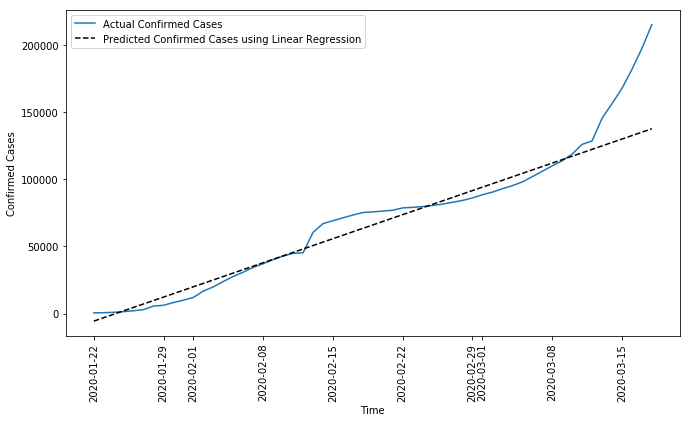

In [31]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Confirmed"],label="Actual Confirmed Cases")
plt.plot(datewise.index,prediction_linreg, linestyle='--',label="Predicted Confirmed Cases using Linear Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=90)
plt.legend()

#### Support Vector Machine ModelRegressor for Prediction of Confirmed Cases 

In [32]:
#Intializing SVR Model and with hyperparameters for GridSearchCV
svm=SVR(degree=3)
param_svm={'kernel':['linear','rbf','poly'],
          'C':[0.1,1],
          'gamma':[0.1,1]}

In [33]:
svm_cv=GridSearchCV(estimator=svm,param_grid=param_svm,cv=5)

In [34]:
#Performing GridSearchCV to find the Best Estimator
svm_cv.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1], 'gamma': [0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
svm_cv.best_estimator_

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [36]:
prediction_valid_svm=svm_cv.best_estimator_.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [37]:
print("Root Mean Square Value:",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))

Root Mean Square Value: 22114.638047894303


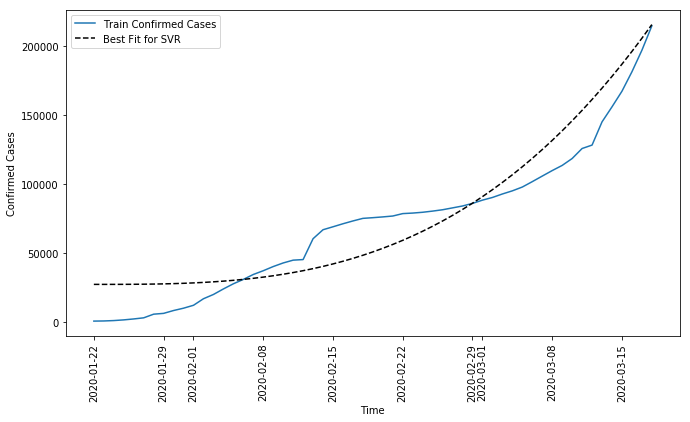

In [38]:
plt.figure(figsize=(11,6))
prediction_svm=svm_cv.best_estimator_.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Confirmed"],label="Train Confirmed Cases")
plt.plot(datewise.index,prediction_svm, linestyle='--',label="Best Fit for SVR",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=90)
plt.legend()

In [39]:
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(52+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm_cv.best_estimator_.predict(np.array(52+i).reshape(-1,1))[0])

In [40]:
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns=["Dates","Linear Regression Prediction","SVM Prediction"])
model_predictions.head()

,Dates,Linear Regression Prediction,SVM Prediction
0,2020-03-19,129790.387000,187105.380025
1,2020-03-20,132345.038911,196327.845998
2,2020-03-21,134899.690821,205898.289021
3,2020-03-22,137454.342732,215823.153127
4,2020-03-23,140008.994642,226108.882329


## Time Series Forecasting 

#### Holt's Linear Model

In [41]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.80)]
valid=datewise.iloc[int(datewise.shape[0]*0.80):]

In [42]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=0.6, smoothing_slope=1.3)
y_pred=valid.copy()

In [43]:
y_pred["Holt"]=holt.forecast(len(valid))
print("Mean Squared Error:",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))

Mean Squared Error: 31047.810808595823


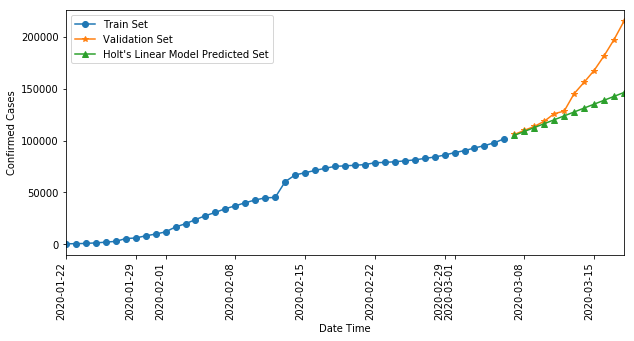

In [44]:
plt.figure(figsize=(10,5))
plt.plot(model_train.Confirmed,label="Train Set",marker='o')
valid.Confirmed.plot(label="Validation Set",marker='*')
y_pred.Holt.plot(label="Holt's Linear Model Predicted Set",marker='^')
plt.ylabel("Confirmed Cases")
plt.xlabel("Date Time")
plt.xticks(rotation=90)
plt.legend()

In [45]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
    holt_new_date.append(datewise.index[-1]+timedelta(days=i))
    holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holt's Linear Model Prediction"]=holt_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,SVM Prediction,Holt's Linear Model Prediction
0,2020-03-19,129790.387000,187105.380025,150040.173721
1,2020-03-20,132345.038911,196327.845998,153793.903843
2,2020-03-21,134899.690821,205898.289021,157547.633964
3,2020-03-22,137454.342732,215823.153127,161301.364086
4,2020-03-23,140008.994642,226108.882329,165055.094208


#### Holt's Winter Model for Daily Time Series

In [46]:
es=ExponentialSmoothing(np.asarray(model_train['Confirmed']),seasonal_periods=5,trend='mul', seasonal='add').fit()

In [47]:
y_pred["Holt's Winter Model"]=es.forecast(len(valid))

In [48]:
np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"]))

34493.77709534266

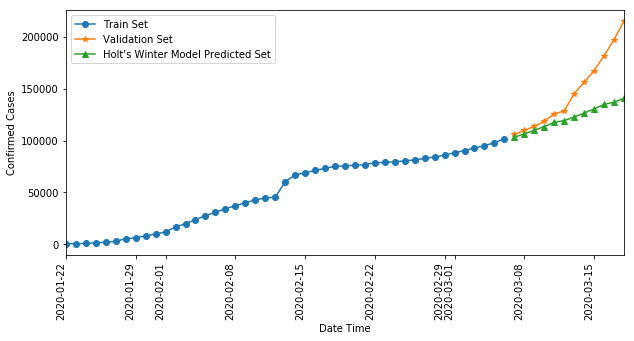

In [49]:
plt.figure(figsize=(10,5))
plt.plot(model_train.Confirmed,label="Train Set",marker='o')
valid.Confirmed.plot(label="Validation Set",marker='*')
y_pred["Holt\'s Winter Model"].plot(label="Holt's Winter Model Predicted Set",marker='^')
plt.ylabel("Confirmed Cases")
plt.xlabel("Date Time")
plt.xticks(rotation=90)
plt.legend()

In [50]:
holt_winter_new_prediction=[]
for i in range(1,18):
    holt_winter_new_prediction.append(es.forecast((len(valid)+i))[-1])
model_predictions["Holt's Winter Model Prediction"]=holt_winter_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction
0,2020-03-19,129790.387000,187105.380025,150040.173721,144894.317072
1,2020-03-20,132345.038911,196327.845998,153793.903843,149308.258599
2,2020-03-21,134899.690821,205898.289021,157547.633964,153987.270949
3,2020-03-22,137454.342732,215823.153127,161301.364086,156506.415159
4,2020-03-23,140008.994642,226108.882329,165055.094208,160769.917022


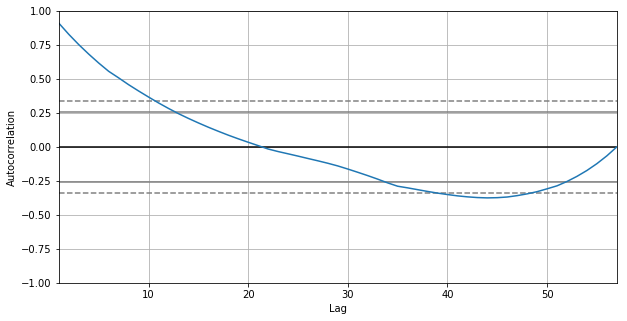

In [51]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10, 5))
autocorrelation_plot(datewise["Confirmed"])

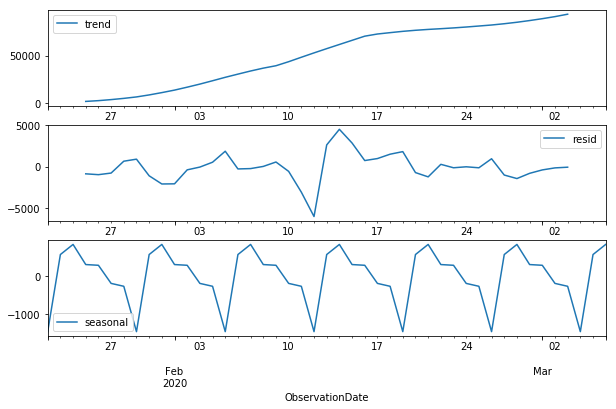

In [63]:
import statsmodels.api as sm
res =sm.tsa.seasonal_decompose(model_train["Confirmed"])
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(10,6))
res.trend.plot(ax=ax1)
ax1.legend()
res.resid.plot(ax=ax2)
ax2.legend()
res.seasonal.plot(ax=ax3)
ax3.legend()

In [64]:
print("Results of Dickey-Fuller test for Original Time Series")
dftest = adfuller(model_train["Confirmed"], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller test for Original Time Series
Test Statistic                 -0.118206
p-value                         0.947595
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


In [65]:
log_series=np.log(model_train["Confirmed"])

In [66]:
print("Results of Dickey-Fuller test for Log Transformed Time-Series")
dftest = adfuller(log_series, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller test for Log Transformed Time-Series
Test Statistic                -8.990153e+00
p-value                        6.926934e-15
#Lags Used                     0.000000e+00
Number of Observations Used    4.400000e+01
Critical Value (1%)           -3.588573e+00
Critical Value (5%)           -2.929886e+00
Critical Value (10%)          -2.603185e+00
dtype: float64


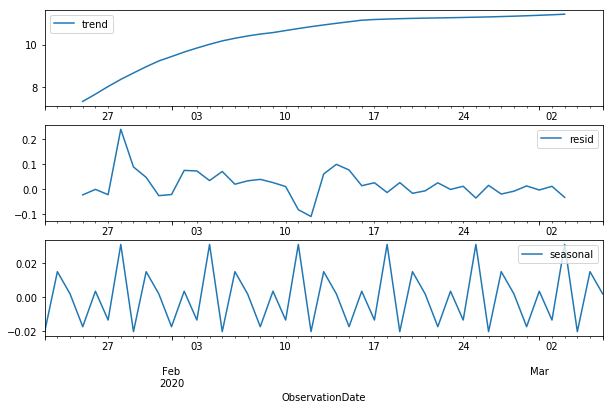

In [67]:
res =sm.tsa.seasonal_decompose(log_series)
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(10,6))
res.trend.plot(ax=ax1)
ax1.legend()
res.resid.plot(ax=ax2)
ax2.legend()
res.seasonal.plot(ax=ax3)
ax3.legend()

### AR Model

In [68]:
model_ar=ARIMA(log_series,(1,1,0))
model_ar_fit=model_ar.fit()

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [69]:
prediction_ar=model_ar_fit.forecast(len(valid))[0]
y_pred["AR Model Prediction"]=list(np.exp(prediction_ar))

In [70]:
np.sqrt(mean_squared_error(list(valid["Confirmed"]),np.exp(prediction_ar)))

78808.54983653291

(array([737446., 737453., 737456., 737463., 737470., 737477., 737484.,
        737485., 737492., 737499.]),
 <a list of 10 Text xticklabel objects>)

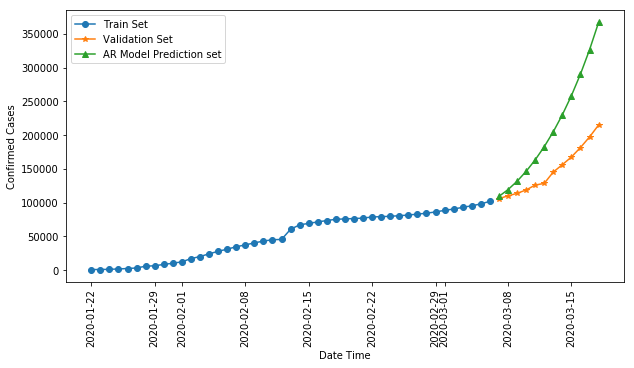

In [71]:
plt.figure(figsize=(10,5))
plt.plot(model_train.index,model_train["Confirmed"],label="Train Set",marker='o')
plt.plot(valid.index,valid["Confirmed"],label="Validation Set",marker='*')
plt.plot(y_pred["AR Model Prediction"],label="AR Model Prediction set",marker="^")
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=90)

In [72]:
AR_model_new_prediction=[]
for i in range(1,18):
    AR_model_new_prediction.append(np.exp(model_ar_fit.forecast(len(valid)+i)[0][-1]))
model_predictions["AR Model Prediction"]=AR_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction
0,2020-03-19,129790.387000,187105.380025,150040.173721,144894.317072,412536.331147
1,2020-03-20,132345.038911,196327.845998,153793.903843,149308.258599,463818.319635
2,2020-03-21,134899.690821,205898.289021,157547.633964,153987.270949,521492.863244
3,2020-03-22,137454.342732,215823.153127,161301.364086,156506.415159,586351.369045
4,2020-03-23,140008.994642,226108.882329,165055.094208,160769.917022,659284.895465


### MA Model

In [73]:
model_ma=ARIMA(log_series,(0,1,1))
model_ma_fit=model_ma.fit()

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [74]:
prediction_ma=model_ma_fit.forecast(len(valid))[0]
y_pred["MA Model Prediction"]=list(np.exp(prediction_ma))

In [75]:
np.sqrt(mean_squared_error(list(valid["Confirmed"]),np.exp(prediction_ma)))

103474.09042113264

(array([737446., 737453., 737456., 737463., 737470., 737477., 737484.,
        737485., 737492., 737499.]),
 <a list of 10 Text xticklabel objects>)

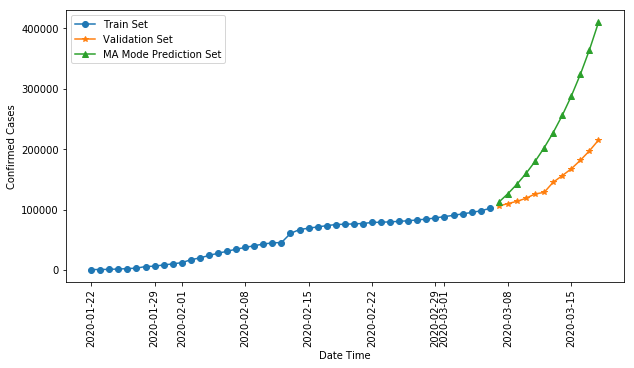

In [76]:
plt.figure(figsize=(10,5))
plt.plot(model_train.index,model_train["Confirmed"],label="Train Set",marker='o')
plt.plot(valid.index,valid["Confirmed"],label="Validation Set",marker='*')
plt.plot(y_pred["MA Model Prediction"],label="MA Mode Prediction Set",marker='^')
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=90)

In [77]:
MA_model_new_prediction=[]
for i in range(1,18):
    MA_model_new_prediction.append(np.exp(model_ma_fit.forecast(len(valid)+i)[0][-1]))
model_predictions["MA Model Prediction"]=MA_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction
0,2020-03-19,129790.387000,187105.380025,150040.173721,144894.317072,412536.331147,461052.201803
1,2020-03-20,132345.038911,196327.845998,153793.903843,149308.258599,463818.319635,518692.180688
2,2020-03-21,134899.690821,205898.289021,157547.633964,153987.270949,521492.863244,583538.213797
3,2020-03-22,137454.342732,215823.153127,161301.364086,156506.415159,586351.369045,656491.190035
4,2020-03-23,140008.994642,226108.882329,165055.094208,160769.917022,659284.895465,738564.625937


### ARIMA Model

In [78]:
model_arima=ARIMA(log_series,(1,1,1))
model_arima_fit=model_arima.fit()

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [79]:
prediction_arima=model_arima_fit.forecast(len(valid))[0]
y_pred["ARIMA Model Prediction"]=list(np.exp(prediction_arima))

In [80]:
np.sqrt(mean_squared_error(list(valid["Confirmed"]),np.exp(prediction_arima)))

4135.90407608564

(array([737446., 737453., 737456., 737463., 737470., 737477., 737484.,
        737485., 737492., 737499.]),
 <a list of 10 Text xticklabel objects>)

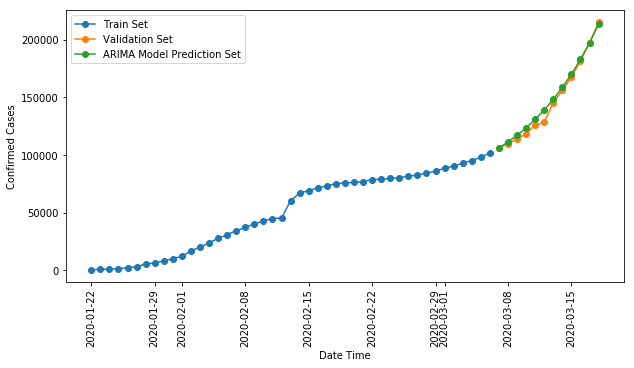

In [81]:
plt.figure(figsize=(10,5))
plt.plot(model_train.index,model_train["Confirmed"],label="Train Set",marker='o')
plt.plot(valid.index,valid["Confirmed"],label="Validation Set",marker='o')
plt.plot(y_pred["ARIMA Model Prediction"],label="ARIMA Model Prediction Set",marker='o')
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=90)

In [82]:
ARIMA_model_new_prediction=[]
for i in range(1,18):
    ARIMA_model_new_prediction.append(np.exp(model_arima_fit.forecast(len(valid)+i)[0][-1]))
model_predictions["ARIMA Model Prediction"]=ARIMA_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction
0,2020-03-19,129790.387000,187105.380025,150040.173721,144894.317072,412536.331147,461052.201803,231275.033432
1,2020-03-20,132345.038911,196327.845998,153793.903843,149308.258599,463818.319635,518692.180688,251335.574887
2,2020-03-21,134899.690821,205898.289021,157547.633964,153987.270949,521492.863244,583538.213797,273770.968317
3,2020-03-22,137454.342732,215823.153127,161301.364086,156506.415159,586351.369045,656491.190035,298874.652044
4,2020-03-23,140008.994642,226108.882329,165055.094208,160769.917022,659284.895465,738564.625937,326979.609073


### Facebook's Prophet Model for forecasting 

In [83]:
prophet_c=Prophet(interval_width=0.95,growth='linear',weekly_seasonality=True)
prophet_confirmed=pd.DataFrame(zip(list(datewise.index),list(datewise["Confirmed"])),columns=['ds','y'])

In [84]:
prophet_c.fit(prophet_confirmed)

In [85]:
forecast_c=prophet_c.make_future_dataframe(periods=17)
forecast_confirmed=forecast_c.copy()

In [86]:
confirmed_forecast=prophet_c.predict(forecast_c)
print(confirmed_forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']])

           ds           yhat     yhat_lower     yhat_upper
0  2020-01-22   -3960.773631  -23755.794680   13578.669767
1  2020-01-23   -5574.330259  -23502.343337   14580.272333
2  2020-01-24   -1931.342494  -19580.905810   16299.845771
3  2020-01-25     614.196680  -18455.882800   19209.860596
4  2020-01-26    3493.860596  -14817.852325   22069.032953
..        ...            ...            ...            ...
69 2020-03-31  249166.489609  229800.502799  267617.603162
70 2020-04-01  256067.191691  236600.295167  275803.327098
71 2020-04-02  257310.088999  236855.240474  277406.424052
72 2020-04-03  263809.530702  243028.766180  284099.844281
73 2020-04-04  269211.523812  248787.309337  289322.600799

[74 rows x 4 columns]


In [87]:
print("RMSE for Prophet Model: ",np.sqrt(mean_squared_error(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0]))))

RMSE for Prophet Model:  9767.164000291237


Figure(720x432)


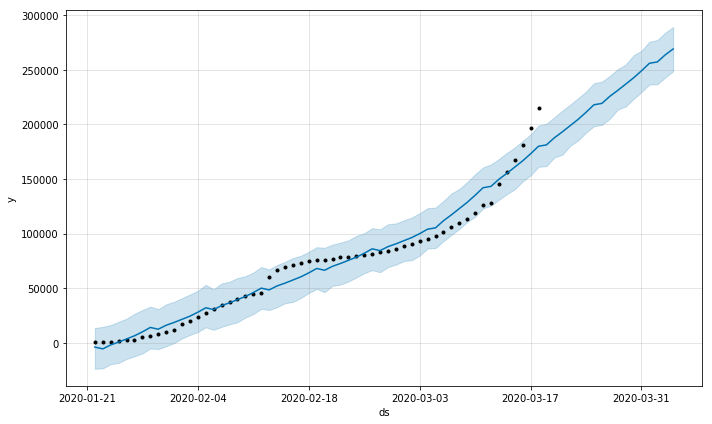

In [88]:
print(prophet_c.plot(confirmed_forecast))

Figure(648x432)


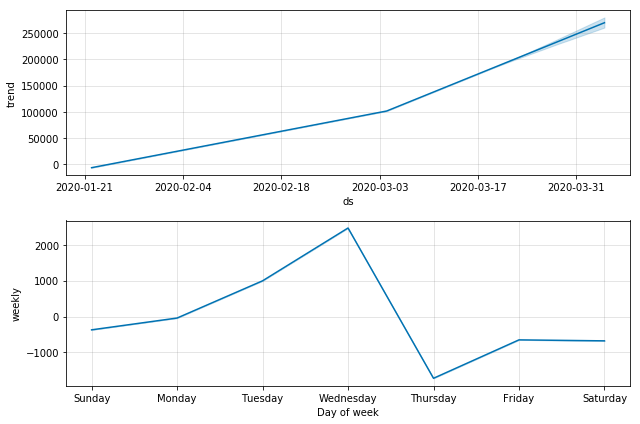

In [89]:
print(prophet_c.plot_components(confirmed_forecast))

#### Summarization of Prediction using different Models

In [90]:
model_predictions["Prophet's Prediction"]=list(confirmed_forecast["yhat"].tail(17))
model_predictions["Prophet's Upper Bound"]=list(confirmed_forecast["yhat_upper"].tail(17))
model_predictions.head()

,Dates,Linear Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,Prophet's Prediction,Prophet's Upper Bound
0,2020-03-19,129790.387000,187105.380025,150040.173721,144894.317072,412536.331147,461052.201803,231275.033432,181300.268619,200633.644082
1,2020-03-20,132345.038911,196327.845998,153793.903843,149308.258599,463818.319635,518692.180688,251335.574887,187799.710321,206648.979984
2,2020-03-21,134899.690821,205898.289021,157547.633964,153987.270949,521492.863244,583538.213797,273770.968317,193201.703432,212641.898170
3,2020-03-22,137454.342732,215823.153127,161301.364086,156506.415159,586351.369045,656491.190035,298874.652044,198937.821284,218210.399642
4,2020-03-23,140008.994642,226108.882329,165055.094208,160769.917022,659284.895465,738564.625937,326979.609073,204695.718045,224087.184513


## Conclusion

COVID-19 doesn't have very high mortatlity rate as we can see which is the most positive take away. Also the healthily growing Recovery Rate implies the disease is cureable. The only matter of concern is the exponential growth rate of infection. 

Countries like Italy and Korea are facing some serious trouble in containing the disease showing how deadly the neglegence can lead to. The need of the hour is to perform COVID-19 pendemic controlling practices like Testing, Contact Tracing and Quarantine with a speed greater than the speed of disease spread at each country level.

### Will be updating the notebook with new Data Visualization Plot and new Prediction and Forecasting Models. Please upvote the kernel if you have liked the work. Also, any kind of suggestion and corrections would be highly appreciated!

## Stay Safe and follow basic hygiene Practices!